# **Importando bibliotecas**

In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import string
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

# **Obtendo os artistas presentes no Spotify**

## **Realizando a conexão com a API do Spotify**

In [2]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id='76e709d9b20c4cfd92322dae744a8a24',
                                                         client_secret='ca2ce1227ecf4500a1918025cfcdb2a4'))


# **Realizando a busca dos artistas**

In [3]:
artists = []

for letter in string.ascii_letters:
  for offset in tqdm(range(0, 1000, 50), desc=f'Letra {letter}'):
    results = sp.search(q=letter, type='artist', limit=50, offset=offset)
    artists += results['artists']['items']

Letra Z: 100%|██████████| 20/20 [00:06<00:00,  3.19it/s]


# **Criando uma rede com as informações obtidas e tratando/retirando algumas colunas**

In [4]:
df = pd.DataFrame(artists)
df['external_urls'] = df['external_urls'].map(lambda x: x['spotify'])
df['followers'] = df['followers'].map(lambda x: x['total'])
df['genres'] = df['genres'].map(lambda x: ', '.join(x))
df.drop(columns=['href', 'images', 'type'], inplace=True)
display(df)

,external_urls,followers,genres,id,name,popularity,uri
0,https://open.spotify.com/artist/4dpARuHxo51G3z...,57657211,"british soul, pop, pop soul, uk pop",4dpARuHxo51G3z768sgnrY,Adele,86,spotify:artist:4dpARuHxo51G3z768sgnrY
1,https://open.spotify.com/artist/66CXWjxzNUsdJx...,98814719,pop,66CXWjxzNUsdJxJ2JdwvnR,Ariana Grande,91,spotify:artist:66CXWjxzNUsdJxJ2JdwvnR
2,https://open.spotify.com/artist/13ubrt8QOOCPlj...,14722549,"east coast hip hop, hip hop, rap",13ubrt8QOOCPljQ2FL1Kca,A$AP Rocky,84,spotify:artist:13ubrt8QOOCPljQ2FL1Kca
3,https://open.spotify.com/artist/06HL4z0CvFAxyc...,118971229,pop,06HL4z0CvFAxyc27GXpf02,Taylor Swift,100,spotify:artist:06HL4z0CvFAxyc27GXpf02
4,https://open.spotify.com/artist/7Ln80lUS6He07X...,25991892,"garage rock, modern rock, permanent wave, rock...",7Ln80lUS6He07XvHI8qqHH,Arctic Monkeys,85,spotify:artist:7Ln80lUS6He07XvHI8qqHH
...,...,...,...,...,...,...,...
51995,https://open.spotify.com/artist/5XDSGEZV9xG35P...,12791,,5XDSGEZV9xG35PRLJ0O3hx,The First Edition,39,spotify:artist:5XDSGEZV9xG35PRLJ0O3hx
51996,https://open.spotify.com/artist/5a1i1PflCnkK9N...,1313,,5a1i1PflCnkK9NG4UlC3Wm,zaydie,30,spotify:artist:5a1i1PflCnkK9NG4UlC3Wm
51997,https://open.spotify.com/artist/6GwZeQ69WhS31f...,74,,6GwZeQ69WhS31fHqq46Qny,Zola's Tapes,33,spotify:artist:6GwZeQ69WhS31fHqq46Qny
51998,https://open.spotify.com/artist/10RdVSp5OiUPHj...,4837,riddim,10RdVSp5OiUPHjh4bYKBMM,ZJ Chrome,39,spotify:artist:10RdVSp5OiUPHjh4bYKBMM


# **Retirando os artistas que estão aparecem mais de uma vez no dataset**

In [5]:
df_clean = df.drop_duplicates()
df_clean

,external_urls,followers,genres,id,name,popularity,uri
0,https://open.spotify.com/artist/4dpARuHxo51G3z...,57657211,"british soul, pop, pop soul, uk pop",4dpARuHxo51G3z768sgnrY,Adele,86,spotify:artist:4dpARuHxo51G3z768sgnrY
1,https://open.spotify.com/artist/66CXWjxzNUsdJx...,98814719,pop,66CXWjxzNUsdJxJ2JdwvnR,Ariana Grande,91,spotify:artist:66CXWjxzNUsdJxJ2JdwvnR
2,https://open.spotify.com/artist/13ubrt8QOOCPlj...,14722549,"east coast hip hop, hip hop, rap",13ubrt8QOOCPljQ2FL1Kca,A$AP Rocky,84,spotify:artist:13ubrt8QOOCPljQ2FL1Kca
3,https://open.spotify.com/artist/06HL4z0CvFAxyc...,118971229,pop,06HL4z0CvFAxyc27GXpf02,Taylor Swift,100,spotify:artist:06HL4z0CvFAxyc27GXpf02
4,https://open.spotify.com/artist/7Ln80lUS6He07X...,25991892,"garage rock, modern rock, permanent wave, rock...",7Ln80lUS6He07XvHI8qqHH,Arctic Monkeys,85,spotify:artist:7Ln80lUS6He07XvHI8qqHH
...,...,...,...,...,...,...,...
50998,https://open.spotify.com/artist/3xx17YXYvPl9PB...,56415,"contemporary vocal jazz, ectofolk, folk, lilith",3xx17YXYvPl9PBx6Jzalk4,Shelby Lynne,48,spotify:artist:3xx17YXYvPl9PBx6Jzalk4
50999,https://open.spotify.com/artist/3jvWpZJpokYCoT...,35290,"alternative emo, emo, midwest emo",3jvWpZJpokYCoT0QV4OJg0,You Blew It!,33,spotify:artist:3jvWpZJpokYCoT0QV4OJg0
51135,https://open.spotify.com/artist/53HxKgLPRmkmUq...,72,,53HxKgLPRmkmUqzOv7qVL3,Z,0,spotify:artist:53HxKgLPRmkmUqzOv7qVL3
51137,https://open.spotify.com/artist/0SYlWdOsemdRbG...,0,,0SYlWdOsemdRbGNNU6FF3h,Z,0,spotify:artist:0SYlWdOsemdRbGNNU6FF3h


In [6]:
#df_clean.to_csv('spotify_artists.csv', index=False)

In [3]:
df_clean = pd.read_csv('spotify_artists.csv')

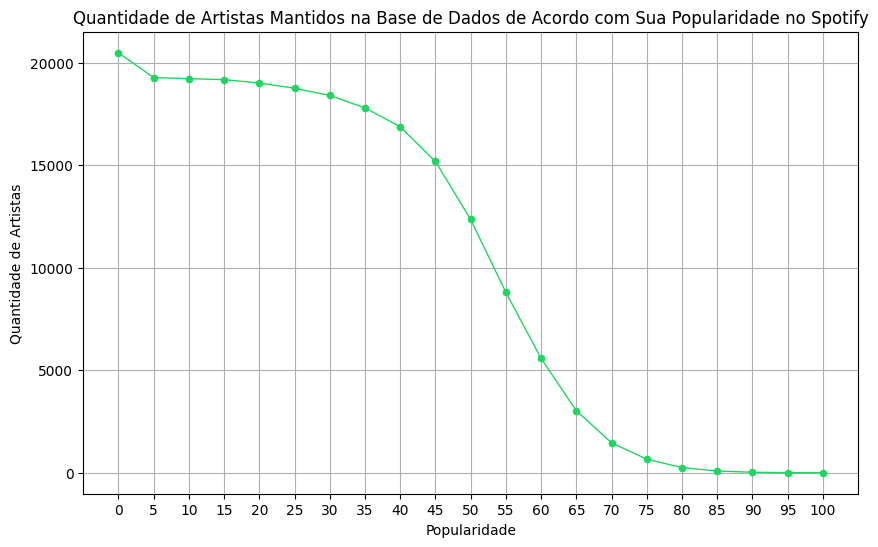

In [22]:
x_values = list(range(0, 105, 5))
quantity_of_artists = [len(df_clean[df_clean['popularity'] >= value]) for value in x_values]

plt.figure(figsize=(10, 6))
plt.plot(x_values, quantity_of_artists, marker = 'o', color = '#1ED760', markersize=4.5, linewidth=1)
plt.xticks(x_values)
plt.title('Quantidade de Artistas Mantidos na Base de Dados de Acordo com Sua Popularidade no Spotify')
plt.xlabel('Popularidade')
plt.ylabel('Quantidade de Artistas')
plt.grid(True)
plt.show()

In [4]:
df_filtered = df_clean[df_clean['popularity'] >= 65]
df_filtered

,external_urls,followers,genres,id,name,popularity,uri
0,https://open.spotify.com/artist/4dpARuHxo51G3z...,57657211,"british soul, pop, pop soul, uk pop",4dpARuHxo51G3z768sgnrY,Adele,86,spotify:artist:4dpARuHxo51G3z768sgnrY
1,https://open.spotify.com/artist/66CXWjxzNUsdJx...,98814719,pop,66CXWjxzNUsdJxJ2JdwvnR,Ariana Grande,91,spotify:artist:66CXWjxzNUsdJxJ2JdwvnR
2,https://open.spotify.com/artist/13ubrt8QOOCPlj...,14722549,"east coast hip hop, hip hop, rap",13ubrt8QOOCPljQ2FL1Kca,A$AP Rocky,84,spotify:artist:13ubrt8QOOCPljQ2FL1Kca
3,https://open.spotify.com/artist/06HL4z0CvFAxyc...,118971229,pop,06HL4z0CvFAxyc27GXpf02,Taylor Swift,100,spotify:artist:06HL4z0CvFAxyc27GXpf02
4,https://open.spotify.com/artist/7Ln80lUS6He07X...,25991892,"garage rock, modern rock, permanent wave, rock...",7Ln80lUS6He07XvHI8qqHH,Arctic Monkeys,85,spotify:artist:7Ln80lUS6He07XvHI8qqHH
...,...,...,...,...,...,...,...
19719,https://open.spotify.com/artist/0pVHBkObr9UNIW...,80561,NaN,0pVHBkObr9UNIWpms1e4I0,Zartmann,67,spotify:artist:0pVHBkObr9UNIWpms1e4I0
19720,https://open.spotify.com/artist/54kCbQZaZWHnww...,2213913,"french hip hop, pop urbaine, r&b francais, rap...",54kCbQZaZWHnwwj9VP2hn4,Zola,67,spotify:artist:54kCbQZaZWHnwwj9VP2hn4
19731,https://open.spotify.com/artist/3qZ2n5keOAat1S...,1799838,"mpb, pagode, partido alto, samba, samba de roda",3qZ2n5keOAat1SoF6bHwmb,Zeca Pagodinho,65,spotify:artist:3qZ2n5keOAat1SoF6bHwmb
20457,https://open.spotify.com/artist/2HIP5sNZWkrPgS...,56794,NaN,2HIP5sNZWkrPgSBWRk8XpA,SIRA,65,spotify:artist:2HIP5sNZWkrPgSBWRk8XpA


In [5]:
import time
artist_related_artists = []

for artist_id in tqdm(df_filtered['id']):
    
    aux_list = []
    related_artists = sp.artist_related_artists(artist_id)
    
    for related_artist in related_artists['artists']:
        if related_artist['id'] in df_filtered['id'].to_numpy():
            aux_list.append(related_artist['id'])
    
    artist_related_artists.append(', '.join(aux_list))

    time.sleep(0.3) 

100%|██████████| 3023/3023 [29:40<00:00,  1.70it/s]


In [7]:
df_filtered.loc[:, 'related_artists'] = artist_related_artists
df_filtered

/tmp/ipykernel_30496/229131279.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:, 'related_artists'] = artist_related_artists


,external_urls,followers,genres,id,name,popularity,uri,related_artists
0,https://open.spotify.com/artist/4dpARuHxo51G3z...,57657211,"british soul, pop, pop soul, uk pop",4dpARuHxo51G3z768sgnrY,Adele,86,spotify:artist:4dpARuHxo51G3z768sgnrY,"5WUlDfRSoLAfcVSX1WnrxN, 2wY79sveU1sp5g7SokKOiI..."
1,https://open.spotify.com/artist/66CXWjxzNUsdJx...,98814719,pop,66CXWjxzNUsdJxJ2JdwvnR,Ariana Grande,91,spotify:artist:66CXWjxzNUsdJxJ2JdwvnR,"4nDoRrQiYLoBzwC5BhVJzF, 0C8ZW7ezQVs4URX5aX7Kqx..."
2,https://open.spotify.com/artist/13ubrt8QOOCPlj...,14722549,"east coast hip hop, hip hop, rap",13ubrt8QOOCPljQ2FL1Kca,A$AP Rocky,84,spotify:artist:13ubrt8QOOCPljQ2FL1Kca,"5dHt1vcEm9qb8fCyLcB3HL, 2P5sC9cVZDToPxyomzF1UH..."
3,https://open.spotify.com/artist/06HL4z0CvFAxyc...,118971229,pop,06HL4z0CvFAxyc27GXpf02,Taylor Swift,100,spotify:artist:06HL4z0CvFAxyc27GXpf02,"0C8ZW7ezQVs4URX5aX7Kqx, 1McMsnEElThX1knmY4oliG..."
4,https://open.spotify.com/artist/7Ln80lUS6He07X...,25991892,"garage rock, modern rock, permanent wave, rock...",7Ln80lUS6He07XvHI8qqHH,Arctic Monkeys,85,spotify:artist:7Ln80lUS6He07XvHI8qqHH,"77SW9BnxLY8rJ0RciFqkHh, 0epOFNiUfyON9EYx7Tpr6V..."
...,...,...,...,...,...,...,...,...
19719,https://open.spotify.com/artist/0pVHBkObr9UNIW...,80561,NaN,0pVHBkObr9UNIWpms1e4I0,Zartmann,67,spotify:artist:0pVHBkObr9UNIWpms1e4I0,"2E5bmPbkiGhZ3ZK798zFIb, 5RgzUZORebl59TcvCRZsD2..."
19720,https://open.spotify.com/artist/54kCbQZaZWHnww...,2213913,"french hip hop, pop urbaine, r&b francais, rap...",54kCbQZaZWHnwwj9VP2hn4,Zola,67,spotify:artist:54kCbQZaZWHnwwj9VP2hn4,"1q7T9rFQ2a2ukA1PU51fo3, 6HCBnyTBSLdb3TFn2ayulY..."
19731,https://open.spotify.com/artist/3qZ2n5keOAat1S...,1799838,"mpb, pagode, partido alto, samba, samba de roda",3qZ2n5keOAat1SoF6bHwmb,Zeca Pagodinho,65,spotify:artist:3qZ2n5keOAat1SoF6bHwmb,
20457,https://open.spotify.com/artist/2HIP5sNZWkrPgS...,56794,NaN,2HIP5sNZWkrPgSBWRk8XpA,SIRA,65,spotify:artist:2HIP5sNZWkrPgSBWRk8XpA,"2SRd7Kx7xWkZjoaFKgEreg, 5RgzUZORebl59TcvCRZsD2..."


In [13]:
artist_related_artists

['5WUlDfRSoLAfcVSX1WnrxN, 2wY79sveU1sp5g7SokKOiI, 1KCSPY1glIKqW2TotWuXOR, 1HY2Jd0NmPuamShAr6KMms, 3BmGtnKgCSGYIUhmivXKWX, 5YGY8feqx7naU7z4HrwZM6, 6jJ0s89eD6GaHleKKya26X, 5pKCCKE2ajJHZ9KAiaK11H, 6vWDO969PvNqNYHIOW5v0m, 2gsggkzM5R49q6jpPvazou, 3DiDSECUqqY1AuBP8qtaIa, 6M2wZ9GZgrQXHCFfjv46we, 0du5cEVh5yTK9QJze8zA0C, 0X2BH1fck6amBIoJhDVmmJ, 6eUKZXaKkcviH0Ku9w2n3V, 26dSoYclwsYLMAKD3tpOr4, 1l7ZsJRRS8wlW3WfJfPfNS, 04gDigrS5kc9YWfZHwBETP, 6S2OmqARrzebs0tKUEyXyp, 4gzpq5DPGxSnKTe4SA8HAU',
 '4nDoRrQiYLoBzwC5BhVJzF, 0C8ZW7ezQVs4URX5aX7Kqx, 5cj0lLjcoR7YOSnhnX0Po5, 6M2wZ9GZgrQXHCFfjv46we, 6S2OmqARrzebs0tKUEyXyp, 74KM79TiuVKeVCqs8QtB0B, 1McMsnEElThX1knmY4oliG, 7n2wHs1TKAczGzO7Dd2rGr, 6jJ0s89eD6GaHleKKya26X, 0hCNtLu0JehylgoiP8L4Gh, 1l8Fu6IkuTP0U5QetQJ5Xt, 3e7awlrlDSwF3iM0WBjGMp, 4kYSro6naA4h99UJvo89HB, 5YGY8feqx7naU7z4HrwZM6, 6JL8zeS1NmiOftqZTRgdTz, 26VFTg2z8YR0cCuwLzESi2, 6qqNVTkY8uBg9cP3Jd7DAH, 6KImCVD70vtIoJWnq6nGn3, 5pKCCKE2ajJHZ9KAiaK11H, 5ZsFI1h6hIdQRw2ti0hz81',
 '5dHt1vcEm9qb8fCyLcB3HL, 2P5sC9cV

In [8]:
df_filtered.to_csv('spotify_related_artists.csv', index=False)

In [62]:
df_filtered['related_artists'].value_counts()

related_artists
                                                                                                                                                                                                                                                  175
7urq0VfqxEYEEiZUkebXT4                                                                                                                                                                                                                              3
7CdGfkCRgPhElnqy3HPJ4a                                                                                                                                                                                                                              2
5eir5zFJpES4j7gsymbVyl                                                                                                                                                                                                                              2


In [70]:
import networkx as nx

network = nx.Graph()
for index, artist_id in tqdm(enumerate(df_filtered['id'])):
  list_related_artists = (df_filtered['related_artists'].iloc[index]).split(', ')
  if list_related_artists != ['']:
    for related_artist_id in list_related_artists:
        if (artist_id, related_artist_id) not in network.edges and (related_artist_id, artist_id) not in network.edges:
          network.add_edge(artist_id, related_artist_id)

0it [00:00, ?it/s]

3023it [00:00, 42132.03it/s]


In [35]:
import os
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network
from IPython.display import display, HTML

In [36]:
def createPlot(*, network, name, viewOnNotebook):
  net = Network(notebook=True, cdn_resources='remote', height="750px", width="100%", bgcolor="#222222", filter_menu=False, directed=False, neighborhood_highlight=True, select_menu=True, font_color='white')
  net.from_nx(network)
  net.barnes_hut(gravity=-4000, central_gravity=0.3, spring_length=250, spring_strength=0.001, damping=1, overlap=0)
  if not os.path.exists('plotagens'): os.makedirs('plotagens')
  net.show(f'plotagens/{name}.html')
  if viewOnNotebook == True:
    display(HTML(f'plotagens/{name}.html'))
  else:
    print(f'Você deve abrir o arquivo "plotagens/{name}.html" no seu navegador.')

In [76]:
def printInformations(network):
    
    print(f'Quantidade de vértices: {network.number_of_nodes()}')
    print(f'Quantidade de arestas: {network.number_of_edges()}')
    print(f'Quantidade de componentes: {nx.number_connected_components(network)}')
    print(f'Menor grau da rede: {min(dict(network.degree()).values())}')
    print(f'Maior grau da rede: {max(dict(network.degree()).values())}')
    print(f'Grau médio da rede: {sum(dict(network.degree()).values())/network.number_of_nodes()}')
    print(f'Densidade da rede: {nx.density(network)}')
    
    selected_nodes = []
    for node in network.nodes():
        if network.degree(node) > 1:
            selected_nodes.append(node)
    clustering_coefficient = nx.clustering(network, nodes = selected_nodes)
    average_clustering_coefficient = nx.average_clustering(network, nodes = selected_nodes, count_zeros = True)
    
    print(f'Coeficiente de clustering médio: {average_clustering_coefficient} (apenas {len(selected_nodes)/network.number_of_nodes():.2%} da rede foi considerada no cálculo, que que possuem grau maior do que um)')

    clustering_nodes = [(round(clustering_coefficient[node],4), node) if node in selected_nodes else ('-', node) for node in network.nodes()]


In [77]:
printInformations(network)

Quantidade de vértices: 2940
Quantidade de arestas: 17660
Quantidade de componentes: 41
Menor grau da rede: 1
Maior grau da rede: 46
Grau médio da rede: 12.013605442176871
Densidade da rede: 0.004087650711866918
Coeficiente de clustering médio: 0.5135705768991174 (apenas 96.87% da rede foi considerada no cálculo, que que possuem grau maior do que um)


In [74]:
createPlot(network = network, name = 'complexNetwork', viewOnNotebook = False)

plotagens/complexNetwork.html
Você deve abrir o arquivo "plotagens/complexNetwork.html" no seu navegador.


In [73]:
network.number_of_nodes()

2940

In [72]:
network.number_of_edges()

17660